In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Levenshtein import distance as levenshtein_distance
import random
import string

In [2]:
metadata = pd.read_csv("data/modelK_metadata.csv")
model_output = pd.read_csv("data/modelK_output.csv")

In [3]:
metadata_mark_types = [text.split(" ")[1] for text in metadata["text"]]
output_mark_types = [text.split(" ")[1] for text in model_output["text"]]

print("metadata     :",metadata_mark_types)
print("model output :",output_mark_types)

metadata     : ['point', 'line', 'bar', 'bar', 'bar', 'point', 'bar', 'bar', 'bar', 'bar', 'bar', 'point', 'bar', 'line', 'line', 'line', 'line', 'line', 'line', 'bar', 'point', 'point', 'point', 'point', 'point', 'point', 'line', 'line', 'line', 'line', 'line', 'point', 'line', 'bar', 'bar', 'line', 'bar']
model output : ['point', 'line', 'bar', 'bar', 'bar', 'point', 'bar', 'bar', 'bar', 'bar', 'bar', 'point', 'bar', 'line', 'line', 'line', 'line', 'line', 'line', 'bar', 'point', 'point', 'point', 'point', 'point', 'point', 'line', 'line', 'line', 'line', 'line', 'point', 'line', 'bar', 'bar', 'line', 'bar']


In [4]:
mark_type = {'line':0, 'bar':1, 'point':2}

control_matrix = np.zeros((3,3))
confusion_matrix = np.zeros((3,3))

for i in range(len(metadata_mark_types)):
    
    confusion_matrix[mark_type[metadata_mark_types[i]]][mark_type[output_mark_types[i]]] += 1
    control_matrix[mark_type[metadata_mark_types[i]]][mark_type[metadata_mark_types[i]]] += 1

results = np.round(confusion_matrix.diagonal() / control_matrix.diagonal(), 2)

print("CONTROL: \n\n",control_matrix,"\n")
print("CONFUSION: \n\n",confusion_matrix)
print("\n Results:\n", results)

CONTROL: 

 [[14.  0.  0.]
 [ 0. 13.  0.]
 [ 0.  0. 10.]] 

CONFUSION: 

 [[14.  0.  0.]
 [ 0. 13.  0.]
 [ 0.  0. 10.]]

 Results:
 [1. 1. 1.]


In [5]:
translator = {"quantitative":"Q", "temporal":"T", "nominal":"N", "ordinal":"O"}

metadata_x_types = [translator[text.split(" ")[3]] for text in metadata["text"]]
metadata_y_types = [translator[text.split(" ")[5]] for text in metadata["text"]]

output_x_types = [translator[text.split(" ")[3]] for text in model_output["text"]]
output_y_types = [translator[text.split(" ")[5]] for text in model_output["text"]]

print("metadata x       :",metadata_x_types)
print("model output x   :",output_x_types,"\n")

print("metadata y       :",metadata_y_types)
print("model output y   :",output_y_types)

metadata x       : ['Q', 'T', 'O', 'N', 'N', 'Q', 'T', 'O', 'T', 'T', 'N', 'T', 'N', 'T', 'T', 'T', 'T', 'O', 'T', 'N', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'T', 'T', 'Q', 'O', 'Q', 'Q', 'T', 'N', 'N', 'T', 'N']
model output x   : ['Q', 'N', 'Q', 'N', 'N', 'Q', 'N', 'N', 'N', 'N', 'N', 'Q', 'N', 'T', 'N', 'N', 'N', 'N', 'N', 'N', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'T', 'Q', 'N', 'Q', 'Q', 'T', 'O', 'N', 'Q', 'N'] 

metadata y       : ['Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q']
model output y   : ['Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q']


In [6]:
xy_type = {"Q":0, "T":1, "N":2, "O":3}

control_matrix2 = np.zeros((4,4))
confusion_matrix2 = np.zeros((4,4))

for i in range(len(metadata_x_types)):
    
    confusion_matrix2[xy_type[metadata_x_types[i]]][xy_type[output_x_types[i]]] += 1
    control_matrix2[xy_type[metadata_x_types[i]]][xy_type[metadata_x_types[i]]] += 1

results2 = np.round(confusion_matrix2.diagonal() / control_matrix2.diagonal(), 2)

print("{Q,T,N,O} \n\nCONTROL (x type): \n\n",control_matrix2,"\n")
print("CONFUSION (x_type): \n\n",confusion_matrix2)
print("\n Results:\n", results2)

{Q,T,N,O} 

CONTROL (x type): 

 [[11.  0.  0.  0.]
 [ 0. 14.  0.  0.]
 [ 0.  0.  8.  0.]
 [ 0.  0.  0.  4.]] 

CONFUSION (x_type): 

 [[11.  0.  0.  0.]
 [ 3.  3.  8.  0.]
 [ 0.  0.  7.  1.]
 [ 1.  0.  3.  0.]]

 Results:
 [1.   0.21 0.88 0.  ]


In [7]:
characters = string.ascii_letters + string.digits

def random_string(length):
    str = "".join(random.choice(characters) for _ in range(length))
    return str

In [8]:
def compare_strings(str1, str2):

    dmax = max(len(str1), len(str2), 1)
    d = (levenshtein_distance(str1,str2))

    return 1 - d / dmax

0

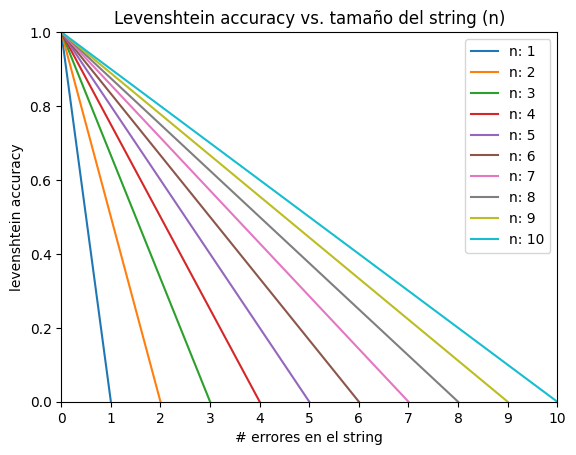

In [22]:
for j in range(1,11):

    text = random_string(j)
    text2 = text

    values = [compare_strings(text, text2)]

    for i in range(len(text)):

        text2 = text2[:i] + "." + text2[i+1:]
        value = compare_strings(text, text2)

        values.append(value)

    plt.ylim(0,1)
    plt.xlim(0,10)
    plt.xticks(np.arange(11))

    plt.plot(values, label = "n: " + str(len(text)))
    plt.legend()

plt.title("Levenshtein accuracy vs. tamaño del string (n)")
plt.xlabel("# errores en el string")
plt.ylabel("levenshtein accuracy")
0

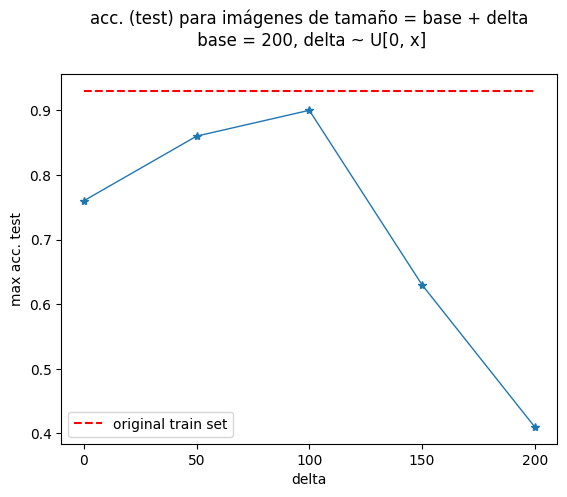

In [5]:
X = [0, 50, 100, 150, 200]
Y = [0.76, 0.86, 0.90, 0.63, 0.41]

plt.xticks([0,50,100,150,200])
plt.xlabel("delta")
plt.ylabel("max acc. test")
plt.title("acc. (test) para imágenes de tamaño = base + delta\n base = 200, delta ~ U[0, x]\n")

plt.plot(X,Y, marker = "*", linewidth = 1)
plt.hlines(xmin = 0, xmax = 200, y = 0.93, color = "red", linestyles = "dashed", label = "original train set")

plt.legend(loc = "lower left")

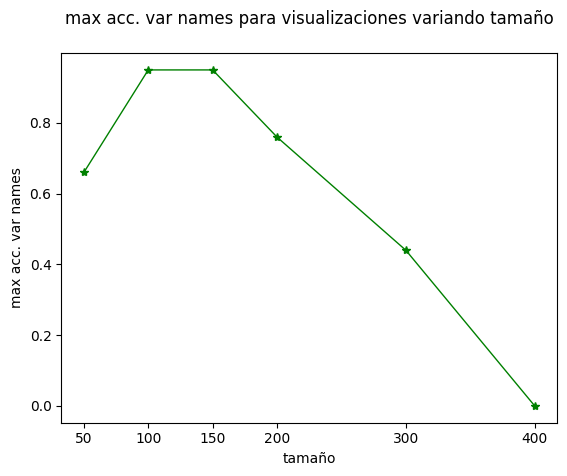

In [27]:
X = [50,100,150,200,300,400]
Y = [0.66,0.95,0.95,0.76,0.44,0.00]

plt.xticks([50,100,150,200,300,400])
plt.xlabel("tamaño")
plt.ylabel("max acc. var names")
plt.title("max acc. var names para visualizaciones variando tamaño\n")

plt.plot(X,Y, marker = "*", linewidth = 1, color = "green")

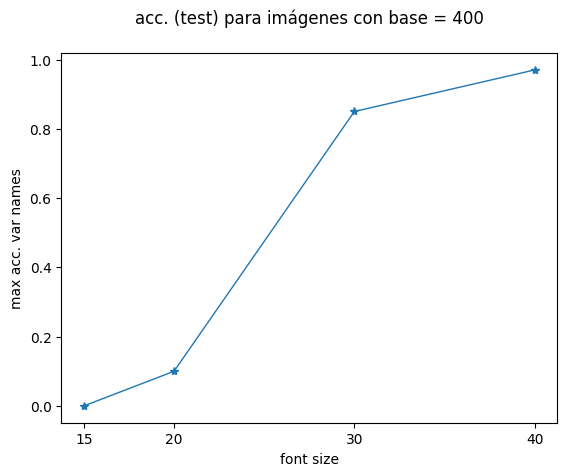

In [25]:
X = [15,20,30,40]
Y = [0,0.1,0.85,0.97]

plt.xticks(X)
plt.xlabel("font size")
plt.ylabel("max acc. var names")
plt.title("acc. (test) para imágenes con base = 400\n")

plt.plot(X,Y, marker = "*", linewidth = 1)

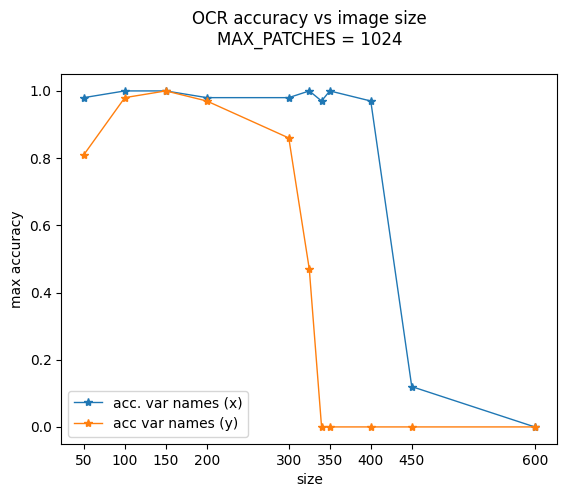

In [13]:
base = [50,100,150,200,300,325,340,350,400,450,600]
acc_x = [0.98,1,1,0.98,0.98,1,0.97,1,0.97,0.12,0]
acc_y = [0.81,0.98,1,0.97,0.86,0.47,0,0,0,0,0]

plt.xticks([50,100,150,200,300,350,400,450,600])
plt.xlabel("size")
plt.ylabel("max accuracy")
plt.title("OCR accuracy vs image size\nMAX_PATCHES = 1024\n")

plt.plot(base, acc_x, marker = "*", linewidth = 1, label = "acc. var names (x)")
plt.plot(base, acc_y, marker = "*", linewidth = 1, label = "acc var names (y)")

plt.legend()

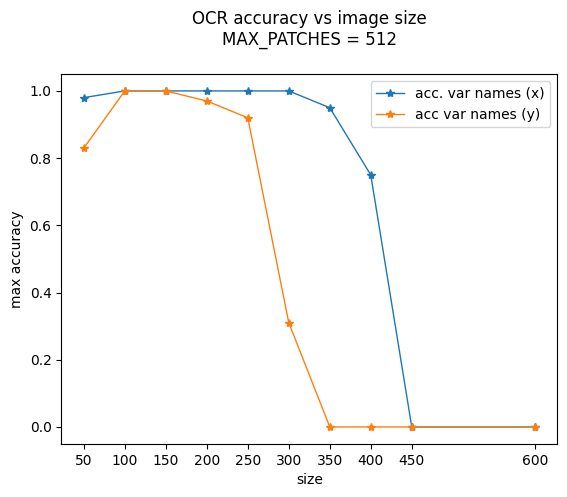

In [12]:
base = [50,100,150,200,250,300,350,400,450,600]
acc_x = [0.98,1,1,1,1,1,0.95,0.75,0,0]
acc_y = [0.83,1,1,0.97,0.92,0.31,0,0,0,0]

plt.xticks(base)
plt.xlabel("size")
plt.ylabel("max accuracy")
plt.title("OCR accuracy vs image size\nMAX_PATCHES = 512\n")

plt.plot(base, acc_x, marker = "*", linewidth = 1, label = "acc. var names (x)")
plt.plot(base, acc_y, marker = "*", linewidth = 1, label = "acc var names (y)")

plt.legend()

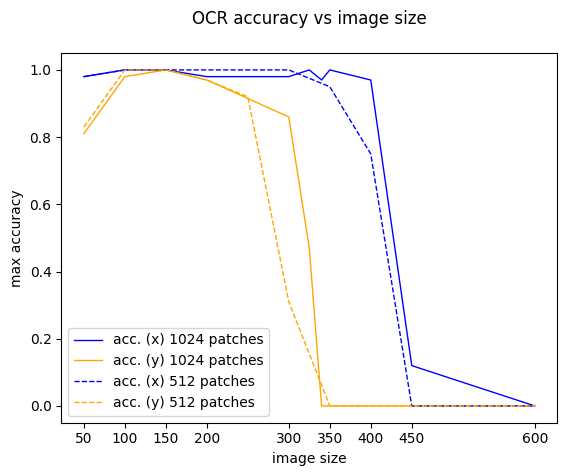

In [30]:
base = [50,100,150,200,300,325,340,350,400,450,600]
acc_x = [0.98,1,1,0.98,0.98,1,0.97,1,0.97,0.12,0]
acc_y = [0.81,0.98,1,0.97,0.86,0.47,0,0,0,0,0]

plt.xticks([50,100,150,200,300,350,400,450,600])
plt.xlabel("image size")
plt.ylabel("max accuracy")
plt.title("OCR accuracy vs image size\n")

plt.plot(base, acc_x, linewidth = 1, label = "acc. (x) 1024 patches", color = "b")
plt.plot(base, acc_y, linewidth = 1, label = "acc. (y) 1024 patches", color = "orange")

base = [50,100,150,200,250,300,350,400,450,600]
acc_x = [0.98,1,1,1,1,1,0.95,0.75,0,0]
acc_y = [0.83,1,1,0.97,0.92,0.31,0,0,0,0]

plt.plot(base, acc_x, linewidth = 1, label = "acc. (x) 512 patches", color = "b", linestyle = "dashed")
plt.plot(base, acc_y, linewidth = 1, label = "acc. (y) 512 patches", color = "orange", linestyle = "dashed")

plt.legend()